In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


In [4]:
date = "SEP25"

mesonCat = "OmegaCat"
mesonNum = 1038
chain_Omega = ROOT.TChain("events")
chain_Omega.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, mesonNum, mesonCat))
df_Omega = ROOT.RDataFrame(chain_Omega)
df_Omega = (df_Omega.Define("scale", "w*lumiIntegrated"))

mesonCat = "Phi3Cat"
mesonNum = 1039
chain__Phi3 = ROOT.TChain("events")
chain__Phi3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, mesonNum, mesonCat))
df_Phi3 = ROOT.RDataFrame(chain__Phi3)
df_Phi3 = (df_Phi3.Define("scale", "w*lumiIntegrated"))

mesonCat = "D0StarRhoCat"
mesonNum = 1040
chain_D0Star3 = ROOT.TChain("events")
chain_D0Star3.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, mesonNum, mesonCat))
df_D0Star3 = ROOT.RDataFrame(chain_D0Star3)
df_D0Star3 = (df_D0Star3.Define("scale", "w*lumiIntegrated"))

mesonCat = "D0StarCat"
mesonNum = 1041
chain_D0Star = ROOT.TChain("events")
chain_D0Star.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, mesonNum, mesonCat))
df_D0Star = ROOT.RDataFrame(chain_D0Star)
df_D0Star = (df_D0Star.Define("scale", "w*lumiIntegrated"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


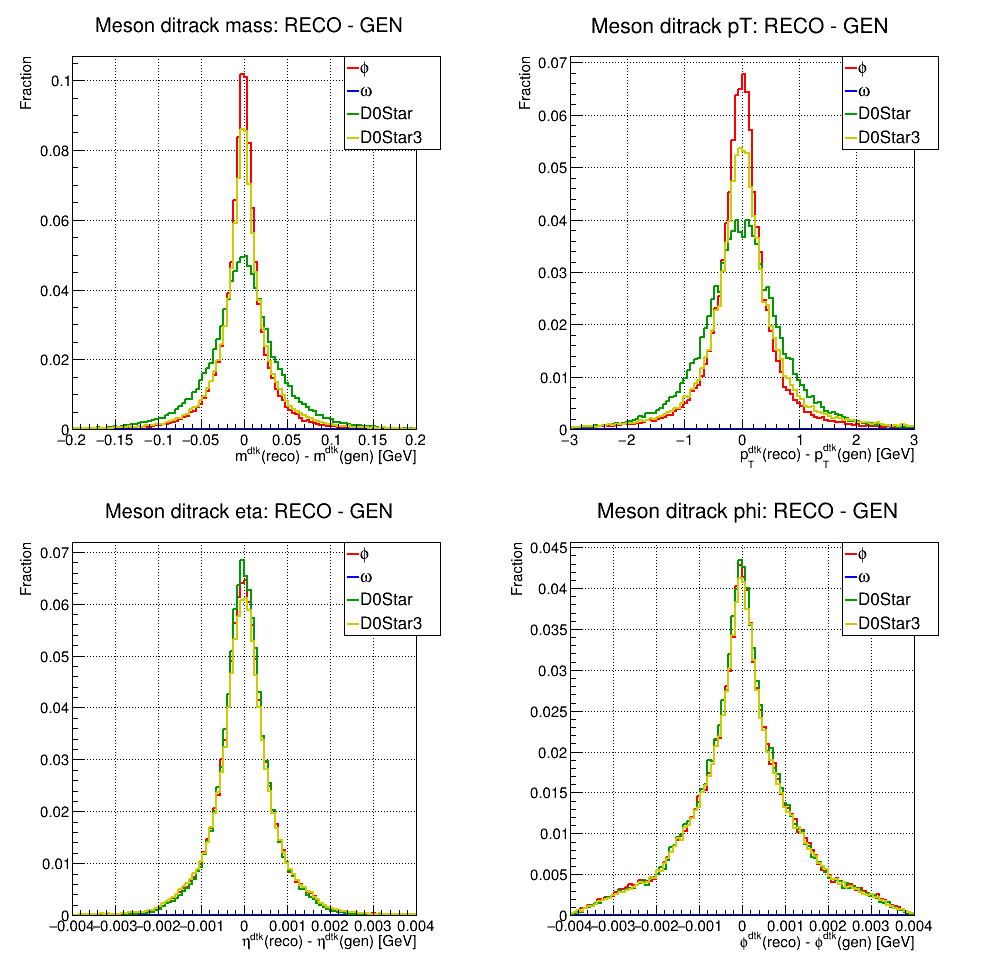

In [31]:
canvas = ROOT.TCanvas("canvas", "canvas", 1000, 1000)
canvas.Divide(2, 2)

# Mass -----------------------------------------------------------------------
nbins, xlow, xhigh = 100, -0.2, 0.2

h_mass_Phi3 = df_Phi3.Define("Diff", "goodMeson_ditrk_mass - goodMeson_ditrk_mass_GEN").Histo1D(("hist", "#phi ditrack m: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_mass_Phi3.SetLineColor(ROOT.kRed)
h_mass_Phi3.SetLineWidth(2)
h_mass_Phi3.GetXaxis().SetTitle("m^{dtk}(reco) - m^{dtk}(gen) [GeV]")
h_mass_Phi3.GetYaxis().SetTitle("Events")
h_mass_Phi3.Scale(1/h_mass_Phi3.GetEntries())

h_mass_Omega = df_Omega.Define("Diff", "goodMeson_ditrk_mass - goodMeson_ditrk_mass_GEN").Histo1D(("hist", "#omega ditrack m: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_mass_Omega.SetLineColor(ROOT.kBlue)
h_mass_Omega.SetLineWidth(2)
h_mass_Omega.GetXaxis().SetTitle("m^{dtk}(reco) - m^{dtk}(gen) [GeV]")
h_mass_Omega.GetYaxis().SetTitle("Events")
h_mass_Omega.Scale(1/h_mass_Omega.GetEntries())

h_mass_D0Star = df_D0Star.Define("Diff", "goodMeson_ditrk_mass - goodMeson_ditrk_mass_GEN").Histo1D(("hist", "D0Star ditrack m: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_mass_D0Star.SetLineColor(ROOT.kGreen+2)
h_mass_D0Star.SetLineWidth(2)
h_mass_D0Star.GetXaxis().SetTitle("m^{dtk}(reco) - m^{dtk}(gen) [GeV]")
h_mass_D0Star.GetYaxis().SetTitle("Events")
h_mass_D0Star.Scale(1/h_mass_D0Star.GetEntries())

h_mass_D0Star3 = df_D0Star3.Define("Diff", "goodMeson_ditrk_mass - goodMeson_ditrk_mass_GEN").Histo1D(("hist", "D0Star3 ditrack m: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_mass_D0Star3.SetLineColor(ROOT.kYellow+1)
h_mass_D0Star3.SetLineWidth(2)
h_mass_D0Star3.GetXaxis().SetTitle("m^{dtk}(reco) - m^{dtk}(gen) [GeV]")
h_mass_D0Star3.GetYaxis().SetTitle("Events")
h_mass_D0Star3.Scale(1/h_mass_D0Star3.GetEntries())

p = canvas.cd(1)
stack_mass = ROOT.THStack("stack", "Meson ditrack mass: RECO - GEN")
stack_mass.Add(h_mass_Phi3)
stack_mass.Add(h_mass_Omega)
stack_mass.Add(h_mass_D0Star)
stack_mass.Add(h_mass_D0Star3)
stack_mass.Draw("hist nostack")
stack_mass.GetXaxis().SetTitle("m^{dtk}(reco) - m^{dtk}(gen) [GeV]")
stack_mass.GetYaxis().SetTitle("Fraction")
legend_mass = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend_mass.SetMargin(0.17)
#legend.SetBorderSize(0)
legend_mass.SetTextSize(0.04)
legend_mass.AddEntry(h_mass_Phi3, "#phi", "l")
legend_mass.AddEntry(h_mass_Omega, "#omega", "l")
legend_mass.AddEntry(h_mass_D0Star, "D0Star", "l")
legend_mass.AddEntry(h_mass_D0Star3, "D0Star3", "l")
legend_mass.Draw()
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)
p.SetGrid()


# PT -----------------------------------------------------------------------
nbins, xlow, xhigh = 100, -3., 3.

h_pt_Phi3 = df_Phi3.Define("Diff", "goodMeson_ditrk_pt - goodMeson_ditrk_pt_GEN").Histo1D(("hist", "#phi ditrack pT: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_pt_Phi3.SetLineColor(ROOT.kRed)
h_pt_Phi3.SetLineWidth(2)
h_pt_Phi3.GetXaxis().SetTitle("p_{T}^{dtk}(reco) - p_{T}^{dtk}(gen) [GeV]")
h_pt_Phi3.GetYaxis().SetTitle("Events")
h_pt_Phi3.Scale(1/h_pt_Phi3.GetEntries())

h_pt_Omega = df_Omega.Define("Diff", "goodMeson_ditrk_pt - goodMeson_ditrk_pt_GEN").Histo1D(("hist", "#omega ditrack pT: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_pt_Omega.SetLineColor(ROOT.kBlue)
h_pt_Omega.SetLineWidth(2)
h_pt_Omega.GetXaxis().SetTitle("p_{T}^{dtk}(reco) - p_{T}^{dtk}(gen) [GeV]")
h_pt_Omega.GetYaxis().SetTitle("Events")
h_pt_Omega.Scale(1/h_pt_Omega.GetEntries())

h_pt_D0Star = df_D0Star.Define("Diff", "goodMeson_ditrk_pt - goodMeson_ditrk_pt_GEN").Histo1D(("hist", "D0Star ditrack pT: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_pt_D0Star.SetLineColor(ROOT.kGreen+2)
h_pt_D0Star.SetLineWidth(2)
h_pt_D0Star.GetXaxis().SetTitle("p_{T}^{dtk}(reco) - p_{T}^{dtk}(gen) [GeV]")
h_pt_D0Star.GetYaxis().SetTitle("Events")
h_pt_D0Star.Scale(1/h_pt_D0Star.GetEntries())

h_pt_D0Star3 = df_D0Star3.Define("Diff", "goodMeson_ditrk_pt - goodMeson_ditrk_pt_GEN").Histo1D(("hist", "D0Star3 ditrack pT: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_pt_D0Star3.SetLineColor(ROOT.kYellow+1)
h_pt_D0Star3.SetLineWidth(2)
h_pt_D0Star3.GetXaxis().SetTitle("p_{T}^{dtk}(reco) - p_{T}^{dtk}(gen) [GeV]")
h_pt_D0Star3.GetYaxis().SetTitle("Events")
h_pt_D0Star3.Scale(1/h_pt_D0Star3.GetEntries())

p = canvas.cd(2)
stack_pt = ROOT.THStack("stack", "Meson ditrack pT: RECO - GEN")
stack_pt.Add(h_pt_Phi3)
stack_pt.Add(h_pt_Omega)
stack_pt.Add(h_pt_D0Star)
stack_pt.Add(h_pt_D0Star3)
stack_pt.Draw("hist nostack")
stack_pt.GetXaxis().SetTitle("p_{T}^{dtk}(reco) - p_{T}^{dtk}(gen) [GeV]")
stack_pt.GetYaxis().SetTitle("Fraction")
legend_pt = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend_pt.SetMargin(0.17)
#legend.SetBorderSize(0)
legend_pt.SetTextSize(0.04)
legend_pt.AddEntry(h_pt_Phi3, "#phi", "l")
legend_pt.AddEntry(h_pt_Omega, "#omega", "l")
legend_pt.AddEntry(h_pt_D0Star, "D0Star", "l")
legend_pt.AddEntry(h_pt_D0Star3, "D0Star3", "l")
legend_pt.Draw()
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)
p.SetGrid()


# Eta -----------------------------------------------------------------------
nbins, xlow, xhigh = 100, -0.004, 0.004

h_eta_Phi3 = df_Phi3.Define("Diff", "goodMeson_ditrk_eta - goodMeson_ditrk_eta_GEN").Histo1D(("hist", "#phi ditrack eta: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_eta_Phi3.SetLineColor(ROOT.kRed)
h_eta_Phi3.SetLineWidth(2)
h_eta_Phi3.GetXaxis().SetTitle("#eta^{dtk}(reco) - #eta^{dtk}(gen) [GeV]")
h_eta_Phi3.GetYaxis().SetTitle("Events")
h_eta_Phi3.Scale(1/h_eta_Phi3.GetEntries())

h_eta_Omega = df_Omega.Define("Diff", "goodMeson_ditrk_eta - goodMeson_ditrk_eta_GEN").Histo1D(("hist", "#omega ditrack eta: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_eta_Omega.SetLineColor(ROOT.kBlue)
h_eta_Omega.SetLineWidth(2)
h_eta_Omega.GetXaxis().SetTitle("#eta^{dtk}(reco) - #eta^{dtk}(gen) [GeV]")
h_eta_Omega.GetYaxis().SetTitle("Events")
h_eta_Omega.Scale(1/h_eta_Omega.GetEntries())

h_eta_D0Star = df_D0Star.Define("Diff", "goodMeson_ditrk_eta - goodMeson_ditrk_eta_GEN").Histo1D(("hist", "D0Star ditrack eta: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_eta_D0Star.SetLineColor(ROOT.kGreen+2)
h_eta_D0Star.SetLineWidth(2)
h_eta_D0Star.GetXaxis().SetTitle("#eta^{dtk}(reco) - #eta^{dtk}(gen) [GeV]")
h_eta_D0Star.GetYaxis().SetTitle("Events")
h_eta_D0Star.Scale(1/h_eta_D0Star.GetEntries())

h_eta_D0Star3 = df_D0Star3.Define("Diff", "goodMeson_ditrk_eta - goodMeson_ditrk_eta_GEN").Histo1D(("hist", "D0Star3 ditrack eta: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_eta_D0Star3.SetLineColor(ROOT.kYellow+1)
h_eta_D0Star3.SetLineWidth(2)
h_eta_D0Star3.GetXaxis().SetTitle("#eta^{dtk}(reco) - #eta^{dtk}(gen) [GeV]")
h_eta_D0Star3.GetYaxis().SetTitle("Events")
h_eta_D0Star3.Scale(1/h_eta_D0Star3.GetEntries())

p = canvas.cd(3)
stack_eta = ROOT.THStack("stack", "Meson ditrack eta: RECO - GEN")
stack_eta.Add(h_eta_Phi3)
stack_eta.Add(h_eta_Omega)
stack_eta.Add(h_eta_D0Star)
stack_eta.Add(h_eta_D0Star3)
stack_eta.Draw("hist nostack")
stack_eta.GetXaxis().SetTitle("#eta^{dtk}(reco) - #eta^{dtk}(gen) [GeV]")
stack_eta.GetYaxis().SetTitle("Fraction")
legend_eta = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend_eta.SetMargin(0.17)
#legend.SetBorderSize(0)
legend_eta.SetTextSize(0.04)
legend_eta.AddEntry(h_eta_Phi3, "#phi", "l")
legend_eta.AddEntry(h_eta_Omega, "#omega", "l")
legend_eta.AddEntry(h_eta_D0Star, "D0Star", "l")
legend_eta.AddEntry(h_eta_D0Star3, "D0Star3", "l")
legend_eta.Draw()
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)
p.SetGrid()


# Phi -----------------------------------------------------------------------
nbins, xlow, xhigh = 100, -0.004, 0.004

h_phi_Phi3 = df_Phi3.Define("Diff", "goodMeson_ditrk_phi - goodMeson_ditrk_phi_GEN").Histo1D(("hist", "#phi ditrack phi: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_phi_Phi3.SetLineColor(ROOT.kRed)
h_phi_Phi3.SetLineWidth(2)
h_phi_Phi3.GetXaxis().SetTitle("#phi^{dtk}(reco) - #phi^{dtk}(gen) [GeV]")
h_phi_Phi3.GetYaxis().SetTitle("Events")
h_phi_Phi3.Scale(1/h_phi_Phi3.GetEntries())

h_phi_Omega = df_Omega.Define("Diff", "goodMeson_ditrk_phi - goodMeson_ditrk_phi_GEN").Histo1D(("hist", "#omega ditrack phi: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_phi_Omega.SetLineColor(ROOT.kBlue)
h_phi_Omega.SetLineWidth(2)
h_phi_Omega.GetXaxis().SetTitle("#phi^{dtk}(reco) - #phi^{dtk}(gen) [GeV]")
h_phi_Omega.GetYaxis().SetTitle("Events")
h_phi_Omega.Scale(1/h_phi_Omega.GetEntries())

h_phi_D0Star = df_D0Star.Define("Diff", "goodMeson_ditrk_phi - goodMeson_ditrk_phi_GEN").Histo1D(("hist", "D0Star ditrack phi: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_phi_D0Star.SetLineColor(ROOT.kGreen+2)
h_phi_D0Star.SetLineWidth(2)
h_phi_D0Star.GetXaxis().SetTitle("#phi^{dtk}(reco) - #phi^{dtk}(gen) [GeV]")
h_phi_D0Star.GetYaxis().SetTitle("Events")
h_phi_D0Star.Scale(1/h_phi_D0Star.GetEntries())

h_phi_D0Star3 = df_D0Star3.Define("Diff", "goodMeson_ditrk_phi - goodMeson_ditrk_phi_GEN").Histo1D(("hist", "D0Star3 ditrack phi: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_phi_D0Star3.SetLineColor(ROOT.kYellow+1)
h_phi_D0Star3.SetLineWidth(2)
h_phi_D0Star3.GetXaxis().SetTitle("#phi^{dtk}(reco) - #phi^{dtk}(gen) [GeV]")
h_phi_D0Star3.GetYaxis().SetTitle("Events")
h_phi_D0Star3.Scale(1/h_phi_D0Star3.GetEntries())

p = canvas.cd(4)
stack_phi = ROOT.THStack("stack", "Meson ditrack phi: RECO - GEN")
stack_phi.Add(h_phi_Phi3)
stack_phi.Add(h_phi_Omega)
stack_phi.Add(h_phi_D0Star)
stack_phi.Add(h_phi_D0Star3)
stack_phi.Draw("hist nostack")
stack_phi.GetXaxis().SetTitle("#phi^{dtk}(reco) - #phi^{dtk}(gen) [GeV]")
stack_phi.GetYaxis().SetTitle("Fraction")
legend_phi = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend_phi.SetMargin(0.17)
#legend.SetBorderSize(0)
legend_phi.SetTextSize(0.04)
legend_phi.AddEntry(h_phi_Phi3, "#phi", "l")
legend_phi.AddEntry(h_phi_Omega, "#omega", "l")
legend_phi.AddEntry(h_phi_D0Star, "D0Star", "l")
legend_phi.AddEntry(h_phi_D0Star3, "D0Star3", "l")
legend_phi.Draw()
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)
p.SetGrid()


canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


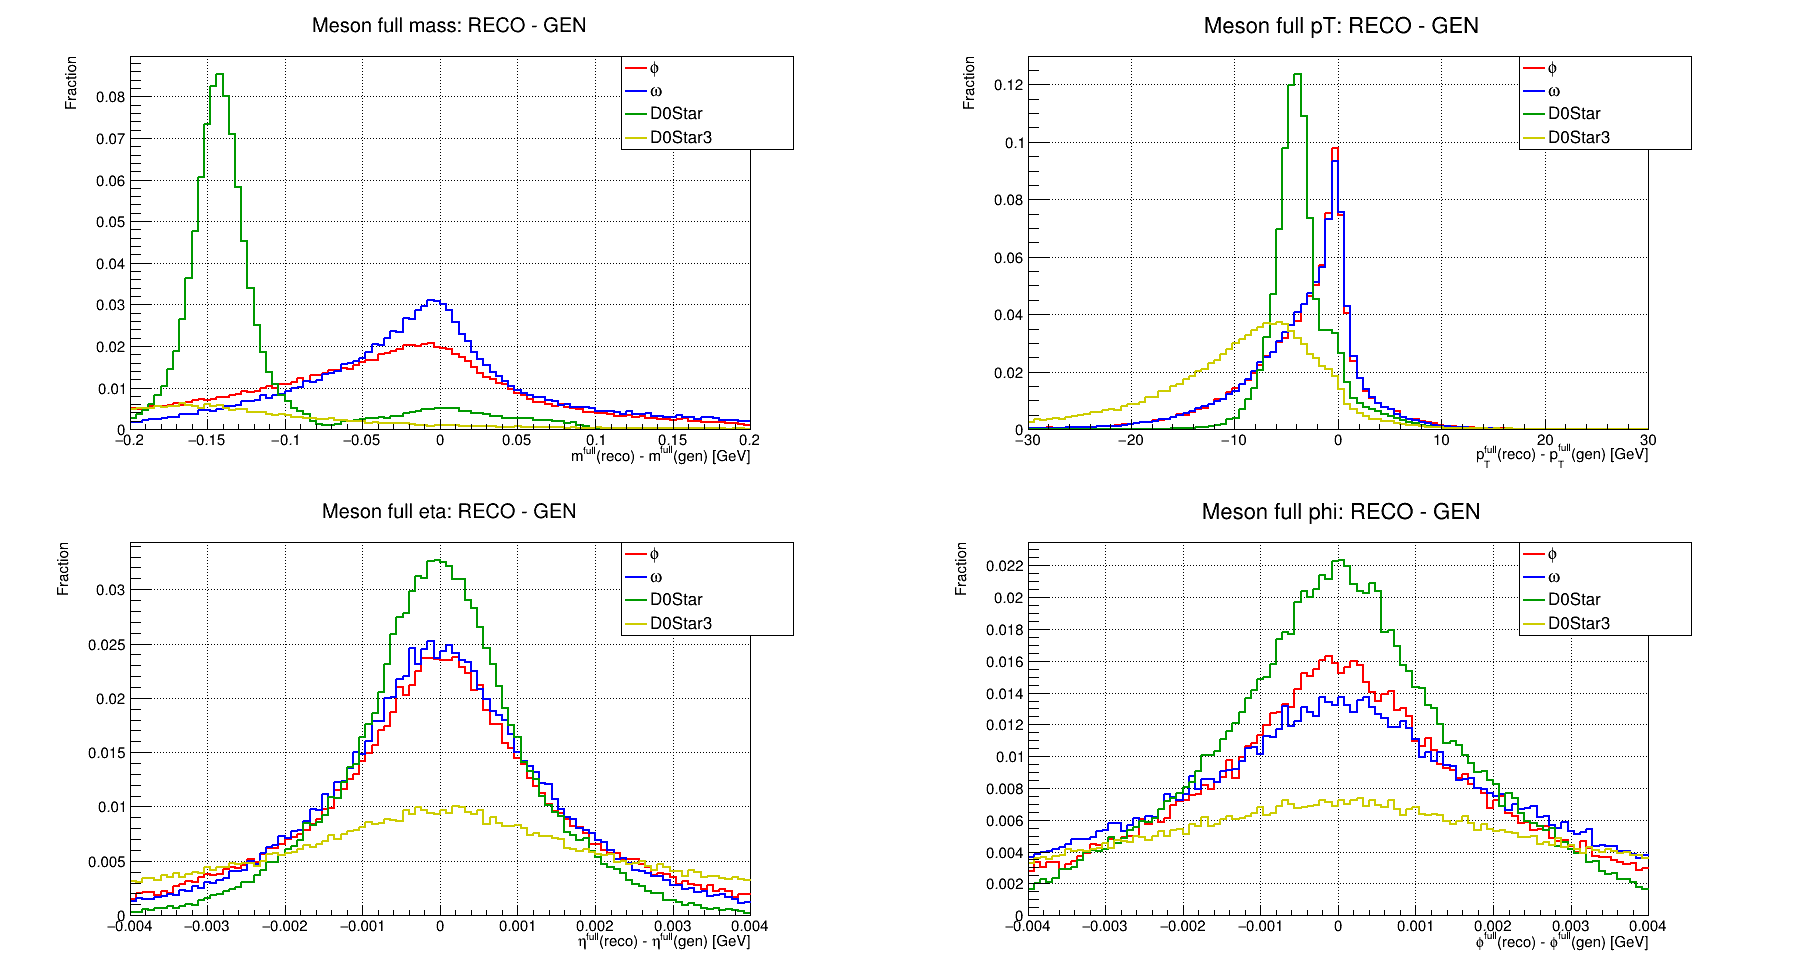

In [34]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 1000)
canvas.Divide(2, 2)

# Mass -----------------------------------------------------------------------
nbins, xlow, xhigh = 100, -0.2, 0.2

h_mass_Phi3 = df_Phi3.Define("Diff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "#phi full m: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_mass_Phi3.SetLineColor(ROOT.kRed)
h_mass_Phi3.SetLineWidth(2)
h_mass_Phi3.GetXaxis().SetTitle("m^{full}(reco) - m^{full}(gen) [GeV]")
h_mass_Phi3.GetYaxis().SetTitle("Events")
h_mass_Phi3.Scale(1/h_mass_Phi3.GetEntries())

h_mass_Omega = df_Omega.Define("Diff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "#omega full m: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_mass_Omega.SetLineColor(ROOT.kBlue)
h_mass_Omega.SetLineWidth(2)
h_mass_Omega.GetXaxis().SetTitle("m^{full}(reco) - m^{full}(gen) [GeV]")
h_mass_Omega.GetYaxis().SetTitle("Events")
h_mass_Omega.Scale(1/h_mass_Omega.GetEntries())

h_mass_D0Star = df_D0Star.Define("Diff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "D0Star full m: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_mass_D0Star.SetLineColor(ROOT.kGreen+2)
h_mass_D0Star.SetLineWidth(2)
h_mass_D0Star.GetXaxis().SetTitle("m^{full}(reco) - m^{full}(gen) [GeV]")
h_mass_D0Star.GetYaxis().SetTitle("Events")
h_mass_D0Star.Scale(1/h_mass_D0Star.GetEntries())

h_mass_D0Star3 = df_D0Star3.Define("Diff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "D0Star3 full m: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_mass_D0Star3.SetLineColor(ROOT.kYellow+1)
h_mass_D0Star3.SetLineWidth(2)
h_mass_D0Star3.GetXaxis().SetTitle("m^{full}(reco) - m^{full}(gen) [GeV]")
h_mass_D0Star3.GetYaxis().SetTitle("Events")
h_mass_D0Star3.Scale(1/h_mass_D0Star3.GetEntries())

p = canvas.cd(1)
stack_mass = ROOT.THStack("stack", "Meson full mass: RECO - GEN")
stack_mass.Add(h_mass_Phi3)
stack_mass.Add(h_mass_Omega)
stack_mass.Add(h_mass_D0Star)
stack_mass.Add(h_mass_D0Star3)
stack_mass.Draw("hist nostack")
stack_mass.GetXaxis().SetTitle("m^{full}(reco) - m^{full}(gen) [GeV]")
stack_mass.GetYaxis().SetTitle("Fraction")
legend_mass = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend_mass.SetMargin(0.17)
#legend.SetBorderSize(0)
legend_mass.SetTextSize(0.04)
legend_mass.AddEntry(h_mass_Phi3, "#phi", "l")
legend_mass.AddEntry(h_mass_Omega, "#omega", "l")
legend_mass.AddEntry(h_mass_D0Star, "D0Star", "l")
legend_mass.AddEntry(h_mass_D0Star3, "D0Star3", "l")
legend_mass.Draw()
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)
p.SetGrid()


# PT -----------------------------------------------------------------------
nbins, xlow, xhigh = 100, -30., 30.

h_pt_Phi3 = df_Phi3.Define("Diff", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "#phi full pT: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_pt_Phi3.SetLineColor(ROOT.kRed)
h_pt_Phi3.SetLineWidth(2)
h_pt_Phi3.GetXaxis().SetTitle("p_{T}^{full}(reco) - p_{T}^{full}(gen) [GeV]")
h_pt_Phi3.GetYaxis().SetTitle("Events")
h_pt_Phi3.Scale(1/h_pt_Phi3.GetEntries())

h_pt_Omega = df_Omega.Define("Diff", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "#omega full pT: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_pt_Omega.SetLineColor(ROOT.kBlue)
h_pt_Omega.SetLineWidth(2)
h_pt_Omega.GetXaxis().SetTitle("p_{T}^{full}(reco) - p_{T}^{full}(gen) [GeV]")
h_pt_Omega.GetYaxis().SetTitle("Events")
h_pt_Omega.Scale(1/h_pt_Omega.GetEntries())

h_pt_D0Star = df_D0Star.Define("Diff", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "D0Star full pT: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_pt_D0Star.SetLineColor(ROOT.kGreen+2)
h_pt_D0Star.SetLineWidth(2)
h_pt_D0Star.GetXaxis().SetTitle("p_{T}^{full}(reco) - p_{T}^{full}(gen) [GeV]")
h_pt_D0Star.GetYaxis().SetTitle("Events")
h_pt_D0Star.Scale(1/h_pt_D0Star.GetEntries())

h_pt_D0Star3 = df_D0Star3.Define("Diff", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "D0Star3 full pT: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_pt_D0Star3.SetLineColor(ROOT.kYellow+1)
h_pt_D0Star3.SetLineWidth(2)
h_pt_D0Star3.GetXaxis().SetTitle("p_{T}^{full}(reco) - p_{T}^{full}(gen) [GeV]")
h_pt_D0Star3.GetYaxis().SetTitle("Events")
h_pt_D0Star3.Scale(1/h_pt_D0Star3.GetEntries())

p = canvas.cd(2)
stack_pt = ROOT.THStack("stack", "Meson full pT: RECO - GEN")
stack_pt.Add(h_pt_Phi3)
stack_pt.Add(h_pt_Omega)
stack_pt.Add(h_pt_D0Star)
stack_pt.Add(h_pt_D0Star3)
stack_pt.Draw("hist nostack")
stack_pt.GetXaxis().SetTitle("p_{T}^{full}(reco) - p_{T}^{full}(gen) [GeV]")
stack_pt.GetYaxis().SetTitle("Fraction")
legend_pt = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend_pt.SetMargin(0.17)
#legend.SetBorderSize(0)
legend_pt.SetTextSize(0.04)
legend_pt.AddEntry(h_pt_Phi3, "#phi", "l")
legend_pt.AddEntry(h_pt_Omega, "#omega", "l")
legend_pt.AddEntry(h_pt_D0Star, "D0Star", "l")
legend_pt.AddEntry(h_pt_D0Star3, "D0Star3", "l")
legend_pt.Draw()
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)
p.SetGrid()


# Eta -----------------------------------------------------------------------
nbins, xlow, xhigh = 100, -0.004, 0.004

h_eta_Phi3 = df_Phi3.Define("Diff", "goodMeson_eta - goodMeson_eta_GEN").Histo1D(("hist", "#phi full eta: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_eta_Phi3.SetLineColor(ROOT.kRed)
h_eta_Phi3.SetLineWidth(2)
h_eta_Phi3.GetXaxis().SetTitle("#eta^{full}(reco) - #eta^{full}(gen) [GeV]")
h_eta_Phi3.GetYaxis().SetTitle("Events")
h_eta_Phi3.Scale(1/h_eta_Phi3.GetEntries())

h_eta_Omega = df_Omega.Define("Diff", "goodMeson_eta - goodMeson_eta_GEN").Histo1D(("hist", "#omega full eta: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_eta_Omega.SetLineColor(ROOT.kBlue)
h_eta_Omega.SetLineWidth(2)
h_eta_Omega.GetXaxis().SetTitle("#eta^{full}(reco) - #eta^{full}(gen) [GeV]")
h_eta_Omega.GetYaxis().SetTitle("Events")
h_eta_Omega.Scale(1/h_eta_Omega.GetEntries())

h_eta_D0Star = df_D0Star.Define("Diff", "goodMeson_eta - goodMeson_eta_GEN").Histo1D(("hist", "D0Star full eta: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_eta_D0Star.SetLineColor(ROOT.kGreen+2)
h_eta_D0Star.SetLineWidth(2)
h_eta_D0Star.GetXaxis().SetTitle("#eta^{full}(reco) - #eta^{full}(gen) [GeV]")
h_eta_D0Star.GetYaxis().SetTitle("Events")
h_eta_D0Star.Scale(1/h_eta_D0Star.GetEntries())

h_eta_D0Star3 = df_D0Star3.Define("Diff", "goodMeson_eta - goodMeson_eta_GEN").Histo1D(("hist", "D0Star3 full eta: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_eta_D0Star3.SetLineColor(ROOT.kYellow+1)
h_eta_D0Star3.SetLineWidth(2)
h_eta_D0Star3.GetXaxis().SetTitle("#eta^{full}(reco) - #eta^{full}(gen) [GeV]")
h_eta_D0Star3.GetYaxis().SetTitle("Events")
h_eta_D0Star3.Scale(1/h_eta_D0Star3.GetEntries())

p = canvas.cd(3)
stack_eta = ROOT.THStack("stack", "Meson full eta: RECO - GEN")
stack_eta.Add(h_eta_Phi3)
stack_eta.Add(h_eta_Omega)
stack_eta.Add(h_eta_D0Star)
stack_eta.Add(h_eta_D0Star3)
stack_eta.Draw("hist nostack")
stack_eta.GetXaxis().SetTitle("#eta^{full}(reco) - #eta^{full}(gen) [GeV]")
stack_eta.GetYaxis().SetTitle("Fraction")
legend_eta = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend_eta.SetMargin(0.17)
#legend.SetBorderSize(0)
legend_eta.SetTextSize(0.04)
legend_eta.AddEntry(h_eta_Phi3, "#phi", "l")
legend_eta.AddEntry(h_eta_Omega, "#omega", "l")
legend_eta.AddEntry(h_eta_D0Star, "D0Star", "l")
legend_eta.AddEntry(h_eta_D0Star3, "D0Star3", "l")
legend_eta.Draw()
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)
p.SetGrid()


# Phi -----------------------------------------------------------------------
nbins, xlow, xhigh = 100, -0.004, 0.004

h_phi_Phi3 = df_Phi3.Define("Diff", "goodMeson_phi - goodMeson_phi_GEN").Histo1D(("hist", "#phi full phi: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_phi_Phi3.SetLineColor(ROOT.kRed)
h_phi_Phi3.SetLineWidth(2)
h_phi_Phi3.GetXaxis().SetTitle("#phi^{full}(reco) - #phi^{full}(gen) [GeV]")
h_phi_Phi3.GetYaxis().SetTitle("Events")
h_phi_Phi3.Scale(1/h_phi_Phi3.GetEntries())

h_phi_Omega = df_Omega.Define("Diff", "goodMeson_phi - goodMeson_phi_GEN").Histo1D(("hist", "#omega full phi: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_phi_Omega.SetLineColor(ROOT.kBlue)
h_phi_Omega.SetLineWidth(2)
h_phi_Omega.GetXaxis().SetTitle("#phi^{full}(reco) - #phi^{full}(gen) [GeV]")
h_phi_Omega.GetYaxis().SetTitle("Events")
h_phi_Omega.Scale(1/h_phi_Omega.GetEntries())

h_phi_D0Star = df_D0Star.Define("Diff", "goodMeson_phi - goodMeson_phi_GEN").Histo1D(("hist", "D0Star full phi: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_phi_D0Star.SetLineColor(ROOT.kGreen+2)
h_phi_D0Star.SetLineWidth(2)
h_phi_D0Star.GetXaxis().SetTitle("#phi^{full}(reco) - #phi^{full}(gen) [GeV]")
h_phi_D0Star.GetYaxis().SetTitle("Events")
h_phi_D0Star.Scale(1/h_phi_D0Star.GetEntries())

h_phi_D0Star3 = df_D0Star3.Define("Diff", "goodMeson_phi - goodMeson_phi_GEN").Histo1D(("hist", "D0Star3 full phi: RECO - GEN", nbins, xlow, xhigh), "Diff").GetValue()
h_phi_D0Star3.SetLineColor(ROOT.kYellow+1)
h_phi_D0Star3.SetLineWidth(2)
h_phi_D0Star3.GetXaxis().SetTitle("#phi^{full}(reco) - #phi^{full}(gen) [GeV]")
h_phi_D0Star3.GetYaxis().SetTitle("Events")
h_phi_D0Star3.Scale(1/h_phi_D0Star3.GetEntries())

p = canvas.cd(4)
stack_phi = ROOT.THStack("stack", "Meson full phi: RECO - GEN")
stack_phi.Add(h_phi_Phi3)
stack_phi.Add(h_phi_Omega)
stack_phi.Add(h_phi_D0Star)
stack_phi.Add(h_phi_D0Star3)
stack_phi.Draw("hist nostack")
stack_phi.GetXaxis().SetTitle("#phi^{full}(reco) - #phi^{full}(gen) [GeV]")
stack_phi.GetYaxis().SetTitle("Fraction")
legend_phi = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend_phi.SetMargin(0.17)
#legend.SetBorderSize(0)
legend_phi.SetTextSize(0.04)
legend_phi.AddEntry(h_phi_Phi3, "#phi", "l")
legend_phi.AddEntry(h_phi_Omega, "#omega", "l")
legend_phi.AddEntry(h_phi_D0Star, "D0Star", "l")
legend_phi.AddEntry(h_phi_D0Star3, "D0Star3", "l")
legend_phi.Draw()
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)
p.SetGrid()


canvas.Draw()